# MUSIC RECOMMENDATION

## By Ananya Kumar Mamillapalli

 ### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np 
import seaborn as sns

### Loading Data

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
train = reduce_mem_usage(pd.read_csv('train.csv'))
test = reduce_mem_usage(pd.read_csv('test.csv'))
ext_song = reduce_mem_usage(pd.read_csv('song_extra_info.csv'))
members = (pd.read_csv('members.csv',parse_dates=['registration_init_time','expiration_date']))
songs = reduce_mem_usage(pd.read_csv('songs.csv'))

Memory usage of dataframe is 337.71 MB
Memory usage after optimization is: 82.41 MB
Decreased by 75.6%
Memory usage of dataframe is 117.04 MB
Memory usage after optimization is: 42.17 MB
Decreased by 64.0%
Memory usage of dataframe is 52.55 MB
Memory usage after optimization is: 227.75 MB
Decreased by -333.4%
Memory usage of dataframe is 122.64 MB
Memory usage after optimization is: 159.83 MB
Decreased by -30.3%


### Analyzing and Visualizing the Data

In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype   
---  ------              -----   
 0   msno                category
 1   song_id             category
 2   source_system_tab   category
 3   source_screen_name  category
 4   source_type         category
 5   target              int8    
dtypes: category(5), int8(1)
memory usage: 82.4 MB


In [6]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype   
---  ------              -----   
 0   id                  int32   
 1   msno                category
 2   song_id             category
 3   source_system_tab   category
 4   source_screen_name  category
 5   source_type         category
dtypes: category(5), int32(1)
memory usage: 42.2 MB


In [8]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [9]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype   
---  ------       -----   
 0   song_id      category
 1   song_length  int32   
 2   genre_ids    category
 3   artist_name  category
 4   composer     category
 5   lyricist     category
 6   language     float16 
dtypes: category(5), float16(1), int32(1)
memory usage: 159.8 MB


In [10]:
ext_song.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [11]:
ext_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype   
---  ------   -----   
 0   song_id  category
 1   name     category
 2   isrc     category
dtypes: category(3)
memory usage: 227.7 MB


In [12]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [13]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  object        
 1   city                    34403 non-null  int64         
 2   bd                      34403 non-null  int64         
 3   gender                  14501 non-null  object        
 4   registered_via          34403 non-null  int64         
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.8+ MB


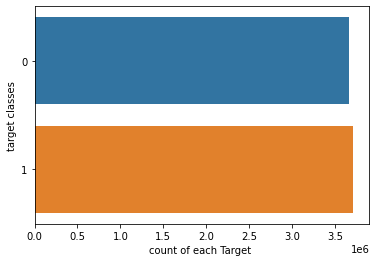

In [14]:
sns.countplot(y=train['target'],data=train)
plt.ylabel('target classes')
plt.xlabel('count of each Target ')
plt.show()

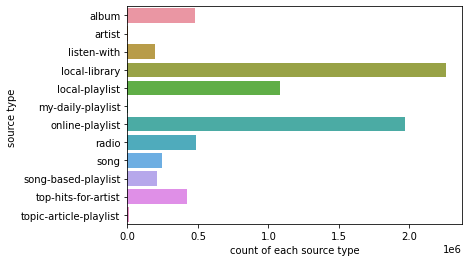

In [15]:
sns.countplot(y=train['source_type'],data=train)
plt.ylabel('source type ')
plt.xlabel('count of each source type')
plt.show()

In [16]:
#mising values
def miss_val(df):
    for col in df.columns:
        nan_count=df[col].isnull().sum()
        total= df.shape[0]
        pp= (nan_count/ total )* 100
        #print(type(pp))
        print(col,'has' ,pp,'% missing values')

In [17]:
print('Taning data')
miss_val(train)

Taning data
msno has 0.0 % missing values
song_id has 0.0 % missing values
source_system_tab has 0.3368251602389888 % missing values
source_screen_name has 5.622617560778039 % missing values
source_type has 0.2919585144829804 % missing values
target has 0.0 % missing values


In [18]:
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
gender has 57.84960613899951 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


In [19]:
print('Song data')
miss_val(songs)

Song data
song_id has 0.0 % missing values
song_length has 0.0 % missing values
genre_ids has 4.0985576923076925 % missing values
artist_name has 0.0 % missing values
composer has 46.65525710702341 % missing values
lyricist has 84.71240942028986 % missing values
language has 4.35479375696767e-05 % missing values


In [20]:
print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 8.710911418306241e-05 % missing values
isrc has 5.9472876617344035 % missing values


### Handling missing values

In [21]:
train['source_system_tab'].value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [22]:
#replace with my library 
train['source_system_tab'].fillna('my library',inplace=True)

In [23]:
train['source_type'].value_counts()


local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

In [24]:
#replace with local-library 
train['source_type'].fillna('local-library',inplace=True)

In [25]:
train['source_screen_name'].value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [26]:
print('Taning data')
miss_val(train)

Taning data
msno has 0.0 % missing values
song_id has 0.0 % missing values
source_system_tab has 0.0 % missing values
source_screen_name has 5.622617560778039 % missing values
source_type has 0.0 % missing values
target has 0.0 % missing values


### Member Data  

In [27]:
members.drop(['gender'], axis =1, inplace=True)

In [28]:
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


### Songs Data  

In [29]:
songs.drop(['composer'], axis =1, inplace=True)
songs.drop(['lyricist'], axis =1, inplace=True)


In [30]:
songs['genre_ids'].value_counts()

465             567911
958             176349
2022            168870
1609            166457
2122            139938
                 ...  
829|1103             1
465|109|958          1
465|1011|691         1
829|1259             1
139|109|94           1
Name: genre_ids, Length: 1045, dtype: int64

In [31]:
#replace with 465 
songs['genre_ids'].fillna('465',inplace=True)

In [32]:
songs['language'].value_counts()

 52.0    1336694
-1.0      639467
 3.0      106295
 17.0      92518
 24.0      41744
 31.0      39201
 10.0      15482
 45.0      14435
 59.0       8098
 38.0       2385
Name: language, dtype: int64

In [33]:
#replace with 465 
songs['language'].fillna(52.0,inplace=True)

In [34]:
print('songs.info data')
miss_val(songs)

songs.info data
song_id has 0.0 % missing values
song_length has 0.0 % missing values
genre_ids has 0.0 % missing values
artist_name has 0.0 % missing values
language has 0.0 % missing values


### Songs exta info data  

In [35]:
ext_song['name'].value_counts()

Intro                                          1734
Silent Night                                   1088
White Christmas                                1018
Jingle Bells                                    964
Ave Maria                                       792
                                               ... 
Jungle no youna machi de(At city as Jungle)       1
Jungle or Forest Scene with Waterfall             1
Jungle the Black                                  1
Jungle urbaine                                    1
￼￼￼ Amigo Passo-Fundense                          1
Name: name, Length: 1168979, dtype: int64

In [36]:
#replace with Into 
ext_song['name'].fillna('Intro',inplace=True)


In [37]:
ext_song['isrc'].value_counts()

GBPS81518952    207
GBPS81527416    205
GBPS81518950    195
GBPS81518680    195
GBPS81518682    194
               ... 
GBQRF0837747      1
GBQRF0837745      1
GBQRF0837744      1
GBQRF0837743      1
ZZA131610001      1
Name: isrc, Length: 1806825, dtype: int64

In [38]:
#replace with Into 
ext_song['isrc'].fillna('GBPS81518952',inplace=True)

In [39]:
print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 0.0 % missing values
isrc has 0.0 % missing values


### Merging Data

In [40]:
#meging data
songs_all= pd.merge(songs,ext_song,
                     on ='song_id' ,how='left')
train_memebrs= pd.merge(train,members,
                    on ='msno' ,how='left')
train_data= pd.merge(train_memebrs,songs_all,
                     on ='song_id' ,how='left')


In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 17 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       category      
 3   source_screen_name      category      
 4   source_type             category      
 5   target                  int8          
 6   city                    int64         
 7   bd                      int64         
 8   registered_via          int64         
 9   registration_init_time  datetime64[ns]
 10  expiration_date         datetime64[ns]
 11  song_length             float64       
 12  genre_ids               category      
 13  artist_name             category      
 14  language                float16       
 15  name                    category      
 16  isrc                    category      
dtypes: category(7), datetime64[ns](2), float16(1),

In [42]:
train_data.drop(['msno'], axis =1, inplace=True)
train_data.drop(['song_id'], axis =1, inplace=True)
train_data.drop(['isrc'], axis =1, inplace=True)
train_data.drop(['artist_name'], axis =1, inplace=True)
train_data.drop(['genre_ids'], axis =1, inplace=True)
train_data.drop(['name'], axis =1, inplace=True)


In [43]:
train_data['membership_days'] = train_data['expiration_date'].subtract(train_data['registration_init_time']).dt.days.astype(int)
train_data['registration_year'] = train_data['registration_init_time'].dt.year
train_data['expiration_year'] = train_data['expiration_date'].dt.year
train_data.drop(columns = ['registration_init_time' , 'expiration_date'] , inplace = True)
train_data.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
0,explore,Explore,online-playlist,1,1,0,7,206471.0,52.0,2103,2012,2017
1,my library,Local playlist more,local-playlist,1,13,24,9,284584.0,52.0,2301,2011,2017
2,my library,Local playlist more,local-playlist,1,13,24,9,225396.0,52.0,2301,2011,2017
3,my library,Local playlist more,local-playlist,1,13,24,9,255512.0,-1.0,2301,2011,2017
4,explore,Explore,online-playlist,1,1,0,7,187802.0,52.0,2103,2012,2017


In [44]:
label_encoding = ['source_system_tab', 'source_screen_name',
       'source_type']

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
for f in label_encoding:
    lb = LabelEncoder()
    lb.fit(list(train_data[f].values) )
    train_data[f] = lb.transform(list(train_data[f].values))
   

In [47]:
for col in train_data.columns:
    if train_data[col].dtype == object:
        train_data[col] = train_data[col].astype('category')
        

In [48]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0015452560773972681 % missing values
language has 0.0015452560773972681 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


In [49]:
train_data['song_length'].value_counts()

235415.0     18749
258298.0     18440
219324.0     17756
250357.0     17740
265508.0     16452
             ...  
1410089.0        1
182813.0         1
550312.0         1
837961.0         1
206192.0         1
Name: song_length, Length: 60266, dtype: int64

In [50]:
#replace with Into 
train_data['song_length'].fillna(235415.0 ,inplace=True)

In [51]:
train_data['language'].value_counts()

 3.0     4044643
 52.0    1864825
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: language, dtype: int64

In [52]:
train_data['language'].fillna(3.0 ,inplace=True)

In [53]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


In [54]:
train_data.replace([np.inf,-np.inf],np.nan, inplace =True)

In [55]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


### Model Building

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [57]:
train_data.shape

(7377418, 12)

In [58]:
train_data = train_data.sample(frac = 1)

In [59]:
train_data1=train_data[0:30000]

In [60]:
train_data1.shape

(30000, 12)

In [61]:
train_data1.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
2179284,3,8,3,0,4,48,7,250944.0,10.0,1572,2013,2017
5388873,2,12,2,1,5,34,3,222075.0,3.0,1209,2014,2017
6394319,3,8,3,1,11,30,9,283846.0,3.0,3464,2008,2017
7031251,0,15,8,0,10,0,7,193306.0,52.0,875,2015,2017
972470,3,8,3,1,11,0,7,203790.0,52.0,1301,2014,2017


In [62]:
x = train_data1.drop(['target'], axis =1)
y = train_data1['target']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 246449 to 6452503
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source_system_tab   21000 non-null  int32  
 1   source_screen_name  21000 non-null  int32  
 2   source_type         21000 non-null  int32  
 3   city                21000 non-null  int64  
 4   bd                  21000 non-null  int64  
 5   registered_via      21000 non-null  int64  
 6   song_length         21000 non-null  float64
 7   language            21000 non-null  float16
 8   membership_days     21000 non-null  int32  
 9   registration_year   21000 non-null  int64  
 10  expiration_year     21000 non-null  int64  
dtypes: float16(1), float64(1), int32(4), int64(5)
memory usage: 1.5 MB


In [65]:
x_train.describe()

,source_system_tab,source_screen_name,source_type,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.00000,21000.000000,21000.000000,21000.000000
mean,2.448714,9.074762,4.738476,7.521143,17.805238,6.810714,2.451836e+05,inf,1635.056190,2012.719143,2017.068762
std,1.867265,4.578384,2.438868,6.648289,26.050232,2.274452,7.890856e+04,21.15625,1128.130901,3.019024,0.390534
min,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.086600e+04,-1.00000,0.000000,2004.000000,2007.000000
25%,0.000000,8.000000,3.000000,1.000000,0.000000,4.000000,2.147260e+05,3.00000,701.000000,2011.000000,2017.000000
50%,3.000000,8.000000,4.000000,5.000000,21.000000,7.000000,2.413710e+05,3.00000,1445.000000,2013.000000,2017.000000
75%,3.000000,11.000000,6.000000,13.000000,29.000000,9.000000,2.715950e+05,52.00000,2299.000000,2015.000000,2017.000000
max,7.000000,20.000000,11.000000,22.000000,1030.000000,13.000000,3.861839e+06,59.00000,5149.000000,2017.000000,2020.000000


In [66]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [67]:
np.isnan(x_test.any())

False

In [68]:
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

### Accuracy

In [69]:
y_pp=clf.predict(x_test)
print ("Test - Accuracy :", accuracy_score(y_test, y_pp))
print ("Test -  Confusion matrix :\n",confusion_matrix(y_test, y_pp))

Test - Accuracy : 0.5921111111111111
Test -  Confusion matrix :
 [[2211 2253]
 [1418 3118]]
